In [1]:
import scanpy as sc
import scvelo as scv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
celltype_palette = {
    'Totipotent':'#a50026',
    'Pluripotent':'#de3f2e',
    'Multipotent':'#f88d52',
    'Oligopotent':'#fed384',
    'Unipotent':'#ffffbf',
    'Differentiated':'#d3ecf4',
    }

# Basic information

In [3]:
ratio_df = pd.DataFrame(['Totipotent','Pluripotent',
                        'Multipotent','Oligopotent',
                        'Unipotent','Differentiated','cell_num'])
ratio_df.columns = ['celltype']
ratio_df

,celltype
0,Totipotent
1,Pluripotent
2,Multipotent
3,Oligopotent
4,Unipotent
5,Differentiated
6,cell_num


In [4]:
file_path= '/home/liyr/HuBMAP/RNA_velocity_result/scvelo/'
file_list = os.listdir(file_path)
file_list = ['9a36e5319429ec6aca5a8a9fef401929.h5ad','b1f17d04de81b0a8a8e2b894308498d3.h5ad']

fig_path = '/home/liyr/HuBMAP/fig/scvelo/'

vkey = "velocity"
cluster = 'CytoTRACE2_Potency'

In [5]:
for file in file_list:
    print(file)
    adata = sc.read_h5ad(file_path + file)
    counts = adata.obs['CytoTRACE2_Potency'].value_counts()
    proportions = counts / len(adata.obs)

    df = pd.DataFrame(proportions)
    # df.columns = [file.strip('.h5ad')]
    df.columns = [file]
    df['celltype'] = df.index.tolist()
    df.loc[len(df)] = [adata.shape[0],'cell_num']

    ratio_df = pd.merge(ratio_df,df,on='celltype',how='left')

9a36e5319429ec6aca5a8a9fef401929.h5ad
b1f17d04de81b0a8a8e2b894308498d3.h5ad


In [6]:
# ratio_df.T.to_csv('QC/Table_S2.csv')

In [7]:
# df = pd.read_csv('QC/Table_S2.csv',header=1)

df = ratio_df.T
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df['celltype'] = df.index
df['celltype']  = df['celltype'].str.replace('.h5ad', '')
df = df.fillna(0)
df.rename(columns={'celltype': 'uuid'}, inplace=True)
df

celltype,Totipotent,Pluripotent,Multipotent,Oligopotent,Unipotent,Differentiated,cell_num,uuid
9a36e5319429ec6aca5a8a9fef401929.h5ad,0,0,0.156966,0.155631,0.078520,0.608883,13487.0,9a36e5319429ec6aca5a8a9fef401929
b1f17d04de81b0a8a8e2b894308498d3.h5ad,0,0,0.240770,0.180320,0.054112,0.524798,12622.0,b1f17d04de81b0a8a8e2b894308498d3


In [8]:
info = pd.read_csv('QC/hubmap-datasets-metadata-2024-08-28_11-51-13.tsv',sep='\t')
info = info[info['uuid'].isin(df['uuid'].tolist())]
info['organ'] = [e.replace("'", "").replace("[", "").replace("]", "") for e in info["origin_samples_unique_mapped_organs"]]
info

,uuid,hubmap_id,ablation_distance_between_shots_x_units,ablation_distance_between_shots_x_value,ablation_distance_between_shots_y_units,ablation_distance_between_shots_y_value,ablation_frequency_unit,ablation_frequency_value,acquisition_id,acquisition_instrument_model,...,step_z_value,thumbnail_file_abs_path,transposition_input,transposition_kit_number,transposition_method,transposition_transposase_source,umi_offset,umi_read,umi_size,organ
2043,9a36e5319429ec6aca5a8a9fef401929,HBM323.BVBV.658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spleen
2061,b1f17d04de81b0a8a8e2b894308498d3,HBM639.XJJK.393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lymph Node


In [9]:
df2 = pd.merge(df,info[['uuid','organ']],on='uuid',how='left')
df2.to_csv('QC/Table_S2.csv')

# Visualization UMAP

9a36e5319429ec6aca5a8a9fef401929.h5ad


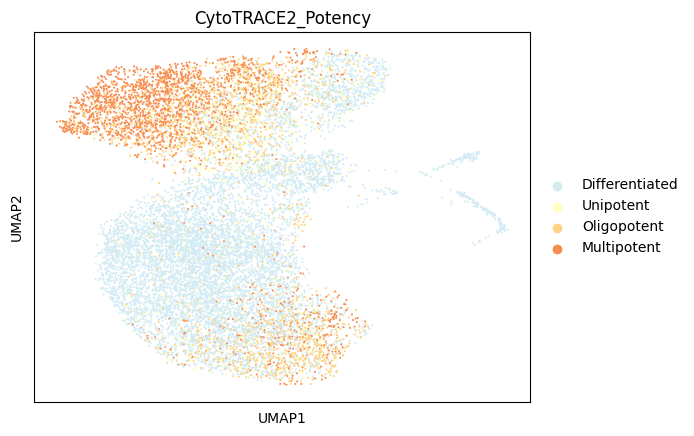

b1f17d04de81b0a8a8e2b894308498d3.h5ad


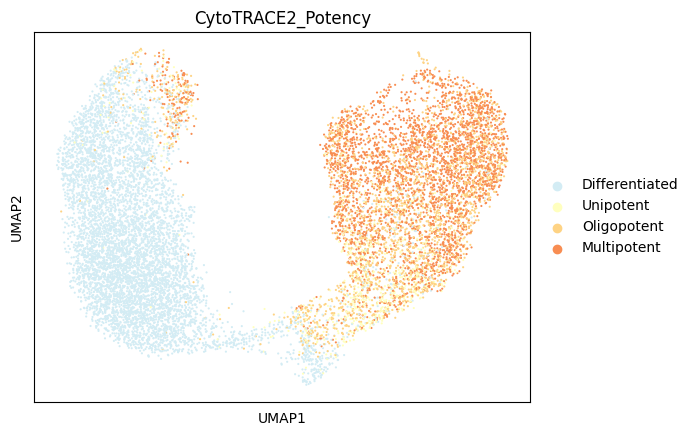

In [10]:
for file in file_list:
    print(file)
    adata = sc.read_h5ad(file_path + file)
    # counts = adata.obs['CytoTRACE2_Potency'].value_counts()
    # proportions = counts / len(adata.obs)

    sc.pl.umap(adata,color=cluster, palette = celltype_palette,legend_loc = 'right margin',
               save = file.strip('.h5ad') + ".pdf")